## Lab3 - Activity 1 Linear Model

Input: NHL Top 100 players 

Output: Fitted Linear models

Process: “lm” model of R, summary of metrics in a table and interpretation of the results.

Get the data from: https://buffalo.box.com/s/jm1hki9hbnlm4kzfkaimkzilys3dm8dg

In [1]:
require(gdata)
data = read.xls(("lab3Data/NHLTop100.xlsx"), sheet = 1, header = TRUE)

Loading required package: gdata
gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith



In [2]:
head(data)

Rank,Player,Team,Pos,X1st.NHL.Season,Last.NHL.Season,GP,G,A,P,X...,PIM,PP,SH,GW,GT,OT,Shots
1,Wayne Gretzky,,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089
2,Mark Messier,,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219
3,Gordie Howe,,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA
4,Ron Francis,,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754
5,Marcel Dionne,,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366
6,Steve Yzerman,,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602


In [3]:
# Taking all the required columns - Assists and Goals

nhl_data <- data.frame(G=data$G, A=data$A)
nrow(nhl_data)

[1] 100

#### a. After the initial fitting, evaluate the fit by noting the R2 and p values of the fit.

In [4]:
#Initial fit
model_a = lm(A~G, data = nhl_data)

In [5]:
# p value for the initial fit
model_a_p <- anova(model_a)$'Pr(>F)'[1]

# R square value for the initial fit
model_a_r2 <- summary(model_a)$r.squared


#Combing the results for interpretation
result <- NULL
result <- rbind(result, c("Initial", model_a_p, model_a_r2))
result

Initial,0.00083171692385433,0.10823050447434


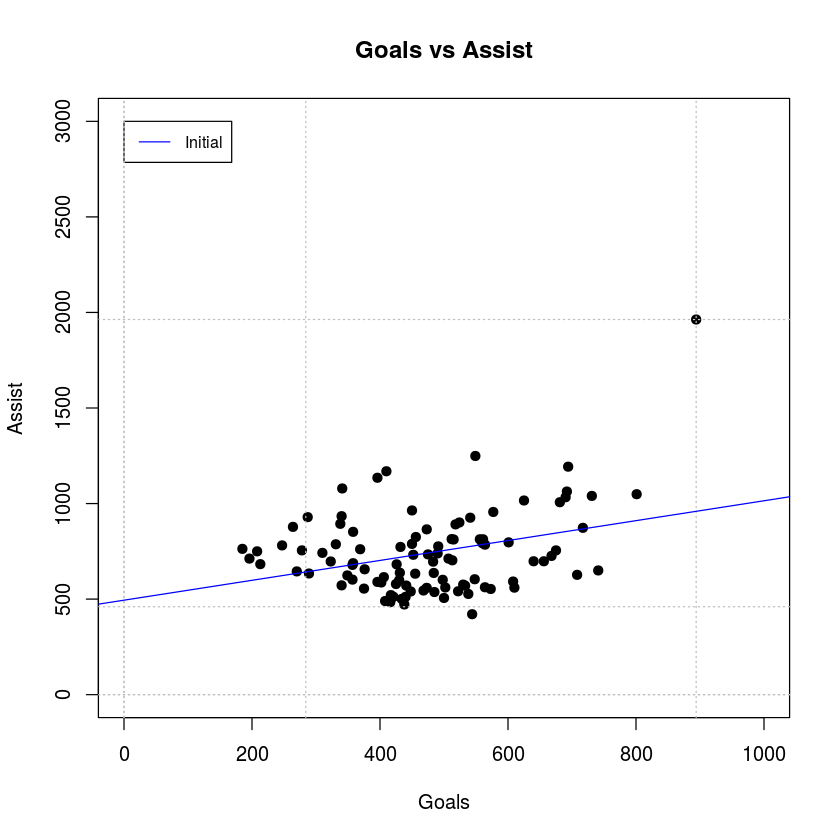

In [6]:
plot(A ~ G, data=nhl_data, main="Goals vs Assist", pch = 19, xlim = c(0,1000), ylim = c(0,3000), 
     xlab = "Goals", ylab = "Assist")

legend(0, 3000, legend=c("Initial"),col=c("blue"), lty=1, cex=0.8)
abline(h=c(0,1963),v=c(0,894),lty=3,col="gray")
abline(h=c(0,460),v=c(0,284),lty=3,col="gray")
abline(model_a, col="blue")

#### b. Change the model so that it line is forced through Wayne Gretzky. Note the R2 and p values of the fit. This will another line or if you prefer another plot.

In [7]:
# Fit for Wayne Gretzky

model_b = lm(I(A-1963)~I(G-894)+0,data = nhl_data)

In [8]:
# p value for the initial fit
model_b_p <- anova(model_b)$'Pr(>F)'[1]

# R square value for the initial fit
model_b_r2 <- summary(model_b)$r.squared

#Combing the results for interpretation
result <- rbind(result, c("Wayne Gretzky", model_b_p, model_b_r2))
result

Initial,0.00083171692385433,0.10823050447434
Wayne Gretzky,2.29825967950594e-53,0.909145627591712


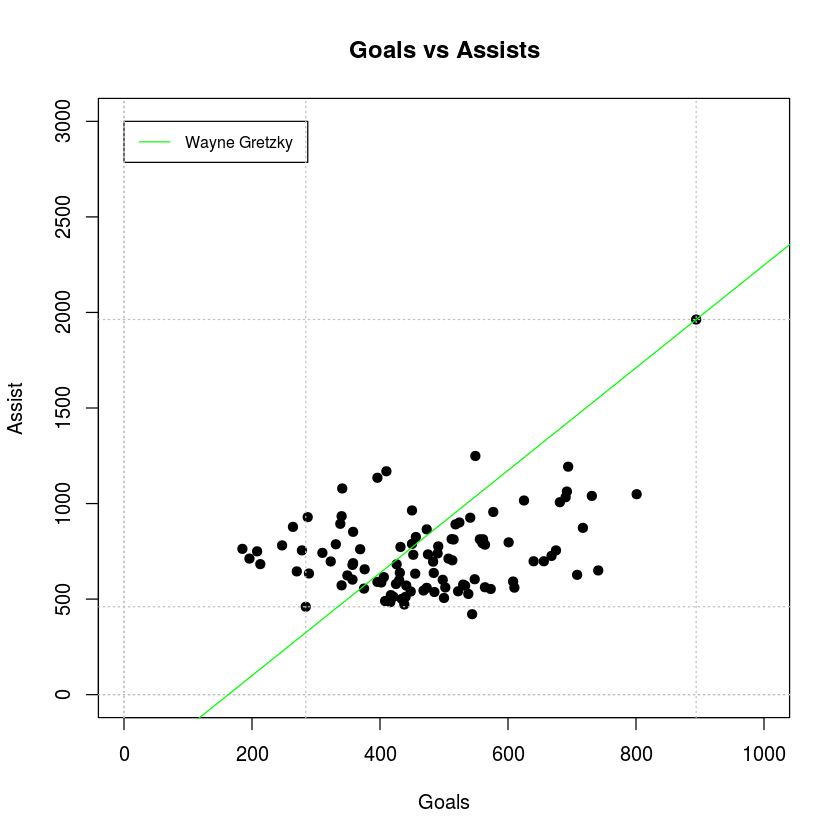

In [27]:
plot(A ~ G, data= nhl_data, main="Goals vs Assists", pch = 19, xlim = c(0,1000), ylim = c(0,3000), 
     xlab = "Goals", ylab = "Assist")

legend(0, 3000, legend=c("Wayne Gretzky"),col=c("green"), lty=1, cex=0.8)
abline(h=c(0,1963),v=c(0,894),lty=3,col="gray")
abline(h=c(0,460),v=c(0,284),lty=3,col="gray")
abline(predict(model_b, newdata = list(G=0))+1963, coef(model_b), col='green')

#### c. Now add the data for another player Patrick Kane (he is a current player). You need to get the data for form online sources. Create a new chart with this addition and force the line through Kane but not Gretzky. Note R2 and p values of the fit.

In [10]:
# Adding data for Patrick Kane (he is a current player)

nhl_data <- rbind(nhl_data, c(284,460))
nrow(nhl_data)

[1] 101

In [11]:
#Fit through Patrick Kane
model_c = lm(I(A-460)~I(G-284)+0,data = nhl_data)

In [12]:
# p value for the initial fit
model_c_p <- anova(model_c)$'Pr(>F)'[1]

# R square value for the initial fit
model_c_r2 <- summary(model_c)$r.squared

#Combing the results for interpretation
result <- rbind(result, c("Patrick Kane but not Gretzky", model_c_p, model_c_r2))
result

Initial,0.00083171692385433,0.10823050447434
Wayne Gretzky,2.29825967950594e-53,0.909145627591712
Patrick Kane but not Gretzky,1.72854422782925e-20,0.578863201897174


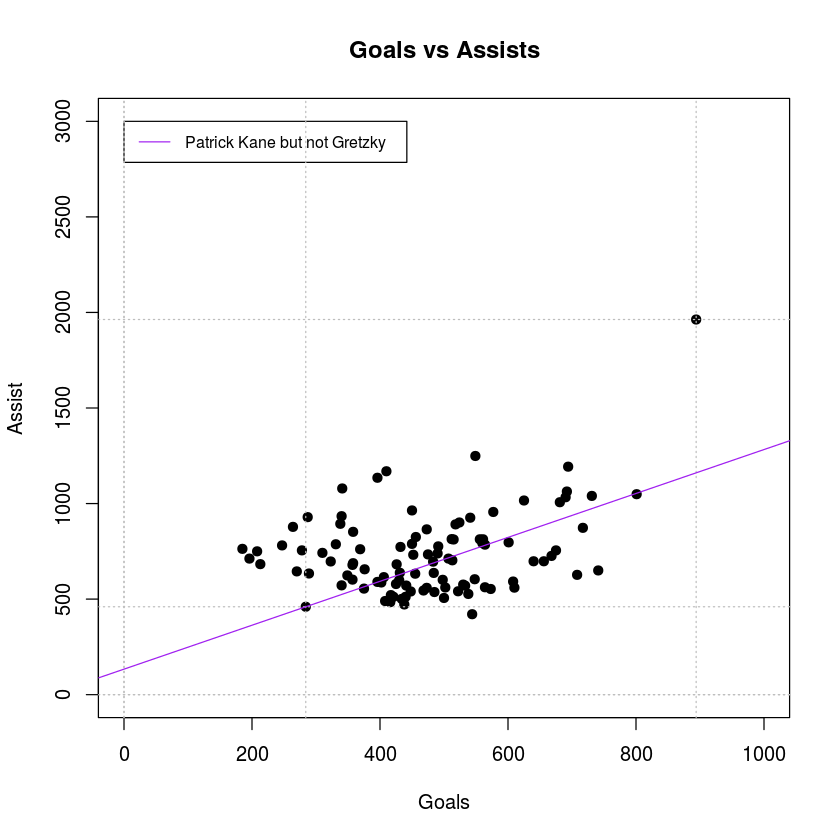

In [26]:
plot(A ~ G, data=nhl_data, main="Goals vs Assists", pch = 19, xlim = c(0,1000), ylim = c(0,3000), 
     xlab = "Goals", ylab = "Assist")

legend(0, 3000, legend=c("Patrick Kane but not Gretzky"),col=c("purple"), lty=1, cex=0.8)
abline(h=c(0,1963),v=c(0,894),lty=3,col="gray")
abline(h=c(0,460),v=c(0,284),lty=3,col="gray")
abline(predict(model_c, newdata = list(G=0))+460, coef(model_c), col='purple')

#### d. Make all the model go through (0,0) and create new models. Note R2 and p values of the fit.

In [14]:
#Initial fit through origin
model_a0 = lm(A~G+0, data = nhl_data)

# p value for the initial fit
model_a0_p <- anova(model_a0)$'Pr(>F)'[1]

# R square value for the initial fit
model_a0_r2 <- summary(model_a0)$r.squared

#Combing the results for interpretation
result <- rbind(result, c("Initial through Origin", model_a0_p, model_a0_r2))
result

Initial,0.00083171692385433,0.10823050447434
Wayne Gretzky,2.29825967950594e-53,0.909145627591712
Patrick Kane but not Gretzky,1.72854422782925e-20,0.578863201897174
Initial through Origin,1.74888961345843e-51,0.898519399726132


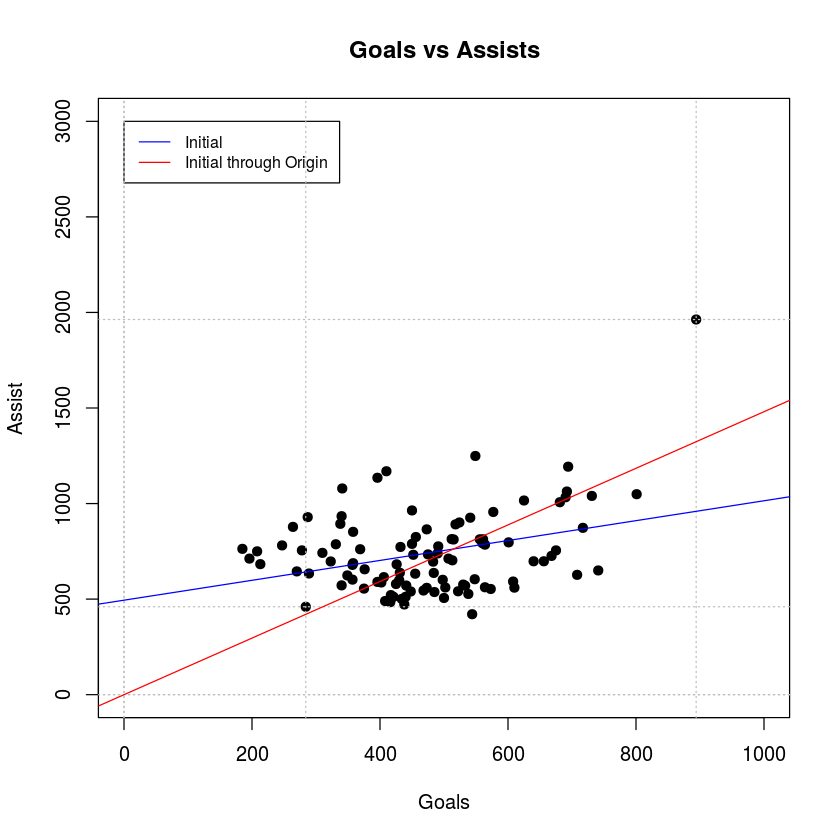

In [15]:
plot(A ~ G, data=nhl_data, main="Goals vs Assists", pch = 19, xlim = c(0,1000), ylim = c(0,3000), 
     xlab = "Goals", ylab = "Assist")

legend(0, 3000, legend=c("Initial", "Initial through Origin"),col=c("blue", "red"), lty=1, cex=0.8)
abline(h=c(0,1963),v=c(0,894),lty=3,col="gray")
abline(h=c(0,460),v=c(0,284),lty=3,col="gray")
abline(model_a, col="blue")
abline(model_a0, col="red")

In [16]:
#Fit for Wayne Gretzky and origin
model_b0 = (lm(A+368~G+0, data = nhl_data))

# p value for the initial fit
model_b0_p <- anova(model_b0)$'Pr(>F)'[1]

# R square value for the initial fit
model_b0_r2 <- summary(model_b0)$r.squared

#Combing the results for interpretation
result <- rbind(result, c("Wayne Gretzky through Origin", model_b0_p, model_b0_r2))
result

Initial,0.00083171692385433,0.10823050447434
Wayne Gretzky,2.29825967950594e-53,0.909145627591712
Patrick Kane but not Gretzky,1.72854422782925e-20,0.578863201897174
Initial through Origin,1.74888961345843e-51,0.898519399726132
Wayne Gretzky through Origin,2.4486544870002e-57,0.922479213379309


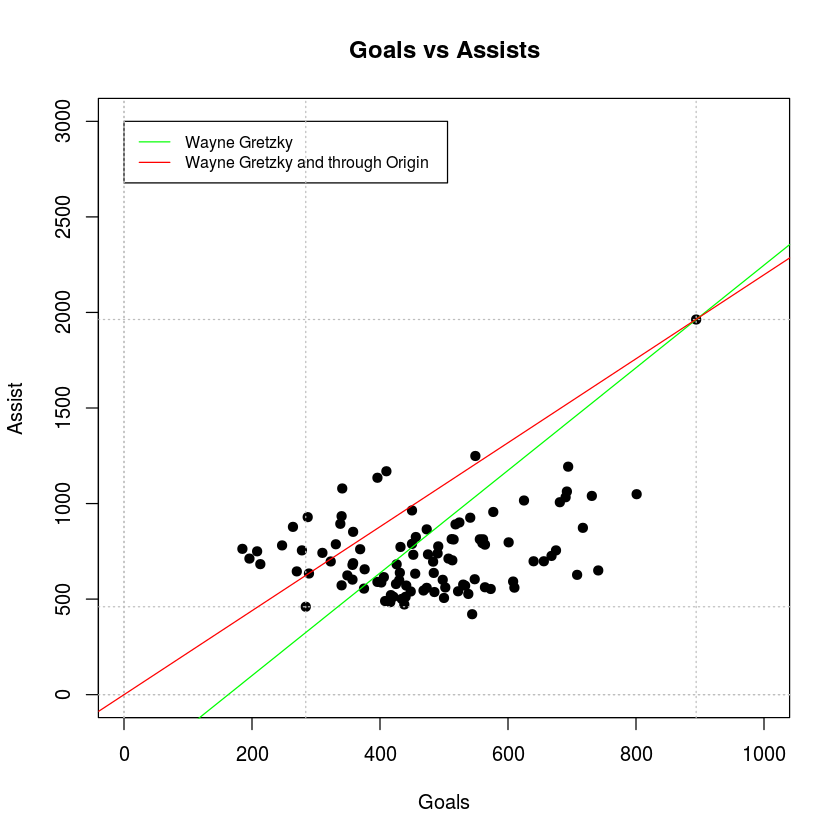

In [29]:
plot(A ~ G, data=nhl_data, main="Goals vs Assists", pch = 19, xlim = c(0,1000), ylim = c(0,3000), 
     xlab = "Goals", ylab = "Assist")

legend(0, 3000, legend=c("Wayne Gretzky", "Wayne Gretzky and through Origin"),col=c("green", "red"), lty=1, cex=0.8)
abline(h=c(0,1963),v=c(0,894),lty=3,col="gray")
abline(h=c(0,460),v=c(0,284),lty=3,col="gray")
abline(predict(model_b, newdata = list(G=0))+1963, coef(model_b), col='green')
abline(model_b0, col="red")

In [18]:
#Fit through Patrick Kane and origin
model_c0 = (lm(A+78~G+0, data = nhl_data))

# p value for the initial fit
model_c0_p <- anova(model_c0)$'Pr(>F)'[1]

# R square value for the initial fit
model_c0_r2 <- summary(model_c0)$r.squared

#Combing the results for interpretation
result <- rbind(result, c("Patrick Kane through Origin", model_c0_p, model_c0_r2))
result

Initial,0.00083171692385433,0.10823050447434
Wayne Gretzky,2.29825967950594e-53,0.909145627591712
Patrick Kane but not Gretzky,1.72854422782925e-20,0.578863201897174
Initial through Origin,1.74888961345843e-51,0.898519399726132
Wayne Gretzky through Origin,2.4486544870002e-57,0.922479213379309
Patrick Kane through Origin,2.43755384276165e-53,0.906823594187916


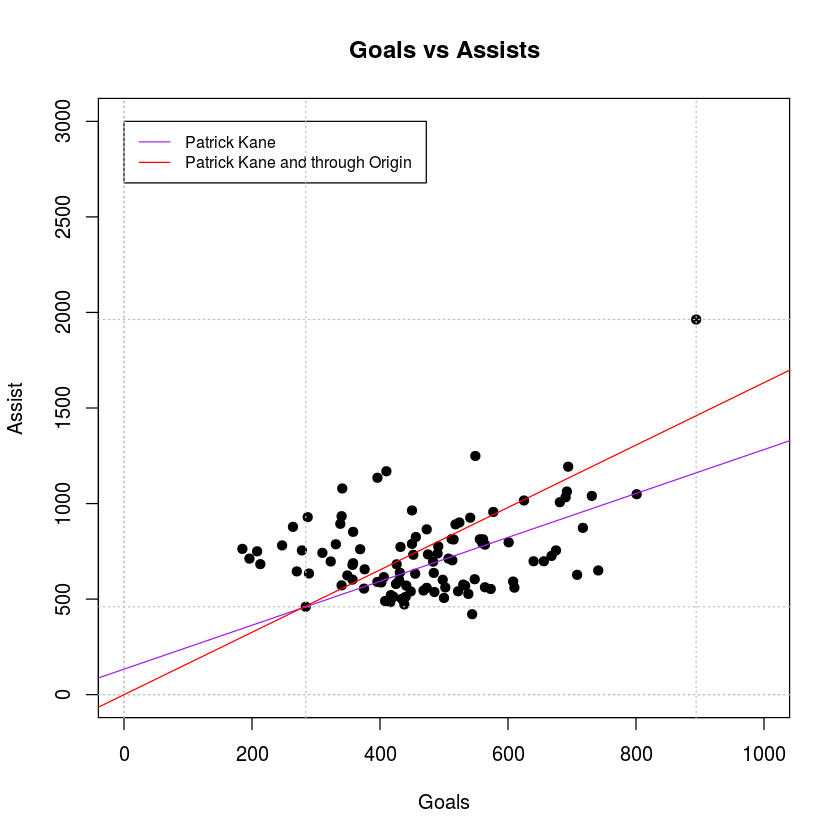

In [34]:
plot(A ~ G, data=nhl_data, main="Goals vs Assists", pch = 19, xlim = c(0,1000), ylim = c(0,3000), 
     xlab = "Goals", ylab = "Assist")

legend(0, 3000, legend=c("Patrick Kane", "Patrick Kane and through Origin"),col=c("purple", "red"), lty=1, cex=0.8)
abline(h=c(0,1963),v=c(0,894),lty=3,col="gray")
abline(h=c(0,460),v=c(0,284),lty=3,col="gray")
abline(predict(model_c, newdata = list(G=0))+460, coef(model_c), col='purple')
abline(model_c0, col="red")

#### e. Create a table of model names (reference), R2 and p values of the fit. Interpret your results.

In [22]:
colnames(result) <- c("Model", "p", "R square")
result

Model,p,R square
Initial,0.00083171692385433,0.10823050447434
Wayne Gretzky,2.29825967950594e-53,0.909145627591712
Patrick Kane but not Gretzky,1.72854422782925e-20,0.578863201897174
Initial through Origin,1.74888961345843e-51,0.898519399726132
Wayne Gretzky through Origin,2.4486544870002e-57,0.922479213379309
Patrick Kane through Origin,2.43755384276165e-53,0.906823594187916


From the above results we can interpret that:

-- The p values decreases when we pass the models from Origin for all the cases. Thus the models passing through Origin i.e, Initial through Origin - model_a0, Wayne Gretzky through Origin - model_b0 and Patrick Kane through Origin - model_c0

-- R square term represents the variance in the model. As near R square is to 1, better is the model. Thus from our results we can say that Wayne Gretzky through Origin model has the best variance and so almost every point lies on the linear regression line


### References:

[1] http://data.princeton.edu/R/linearModels.html

[2] https://www.r-bloggers.com/r-tutorial-series-simple-linear-regression/

[3] https://stat.ethz.ch/R-manual/R-devel/library/stats/html/lm.html

[4] 